In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

In [54]:
data = pd.read_csv('customers.csv', header=0)
data.shape

(400, 5)

In [55]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [56]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [0]:
df = data.copy()
cols = ['Age', 'EstimatedSalary']
features = df[cols]
sc = StandardScaler()
features = sc.fit_transform(features.values)
df[cols] = features

In [58]:
X = df.iloc[:, 1:4]
y = df.iloc[:, 4]
print(X.shape, y.shape)

(400, 3) (400,)


In [59]:
X.head()

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751


In [60]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [67]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [62]:
data.groupby('Purchased').mean().iloc[:, 2:]

,Age,EstimatedSalary
Purchased,,
0,32.793774,60544.747082
1,46.391608,86272.727273


In [63]:
data.groupby('Age').mean().iloc[:, -1]

Age
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.153846
28    0.083333
29    0.100000
30    0.181818
31    0.090909
32    0.555556
33    0.111111
34    0.166667
35    0.093750
36    0.416667
37    0.350000
38    0.076923
39    0.400000
40    0.200000
41    0.062500
42    0.375000
43    0.666667
44    0.500000
45    0.857143
46    0.583333
47    0.857143
48    0.928571
49    0.800000
50    0.750000
51    0.666667
52    0.833333
53    1.000000
54    1.000000
55    1.000000
56    1.000000
57    1.000000
58    1.000000
59    0.714286
60    1.000000
Name: Purchased, dtype: float64

In [64]:
data.groupby('EstimatedSalary').mean().iloc[:, -1]

EstimatedSalary
15000     0.0
16000     0.0
17000     0.0
18000     0.0
19000     0.0
         ... 
146000    1.0
147000    1.0
148000    1.0
149000    1.0
150000    1.0
Name: Purchased, Length: 117, dtype: float64

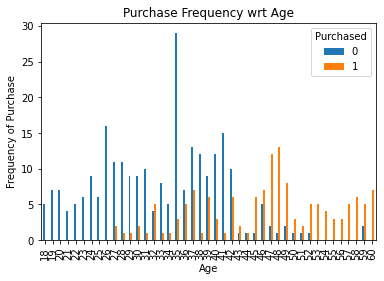

In [68]:
%matplotlib inline
pd.crosstab(data['Age'],y).plot(kind='bar')
plt.title('Purchase Frequency wrt Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Purchase')
plt.show()

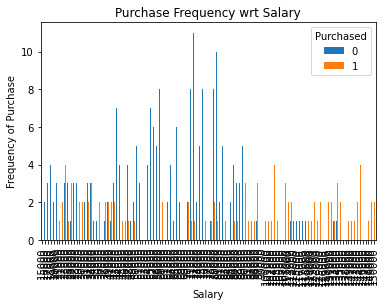

In [69]:
%matplotlib inline
pd.crosstab(data['EstimatedSalary'],y).plot(kind='bar')
plt.title('Purchase Frequency wrt Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency of Purchase')
plt.show()

In [70]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)
print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(320, 3) (80, 3)
(320,) (80,)


In [71]:
train_x.head()

,Gender,Age,EstimatedSalary
336,1,1.943215,2.180561
64,0,2.038728,0.389305
55,0,-1.304232,-0.432911
106,0,-1.113206,-1.020209
300,0,1.943215,-0.932114


In [72]:
classifier = LogisticRegression(random_state=0)
classifier.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
pred_y = classifier.predict(test_x)
pred_y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [78]:
cm = confusion_matrix(test_y, pred_y)
cm

array([[56,  2],
       [ 5, 17]])

In [79]:
print('True Positive:', cm[0, 0])
print('True Negative:', cm[1, 1])
print('False Positive:', cm[0, 1])
print('False Negative:', cm[1, 0])

True Positive: 56
True Negative: 17
False Positive: 2
False Negative: 5


In [80]:
accuracy_score(test_y, pred_y)

0.9125